In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
data=pd.read_csv("/kaggle/input/weather-prediction/seattle-weather.csv")
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [145]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [146]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [147]:
data.duplicated().sum()

0

In [148]:
data.drop("date",axis=1,inplace=True)
data

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [149]:
x=data.drop("weather", axis=1)
y=data["weather"]

In [150]:
x.corr()

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


In [151]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
X_scaled = scalar.fit_transform(x)
         

In [152]:
X_scaled

array([[-0.45364986, -0.49529914, -0.64421175,  1.01497975],
       [ 1.17859791, -0.79473121, -1.08234662,  0.87583314],
       [-0.33385186, -0.64501518, -0.20607688, -0.65477956],
       ...,
       [-0.45364986, -1.25748987, -1.52048149, -0.44605965],
       [-0.45364986, -1.47525865, -1.83912504,  0.11052679],
       [-0.45364986, -1.47525865, -2.05819247,  0.18010009]])

In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y)

In [154]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [155]:
print("X_train shape=",x_train.shape)
print("X_test shape=",x_test.shape)
print("Y_train shape=",y_train.shape)
print("Y_test shape=",y_test.shape)

X_train shape= (1095, 4)
X_test shape= (366, 4)
Y_train shape= (1095,)
Y_test shape= (366,)


In [156]:
y_pred=knn.predict(x_test)

In [157]:
[y_pred]

[array(['rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'sun',
        'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain',
        'rain', 'snow', 'sun', 'rain', 'sun', 'sun', 'rain', 'rain', 'fog',
        'rain', 'rain', 'sun', 'rain', 'rain', 'rain', 'rain', 'rain',
        'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun',
        'rain', 'sun', 'rain', 'rain', 'rain', 'sun', 'fog', 'rain', 'sun',
        'rain', 'rain', 'fog', 'sun', 'fog', 'rain', 'sun', 'rain', 'sun',
        'sun', 'rain', 'rain', 'rain', 'fog', 'fog', 'sun', 'sun', 'sun',
        'sun', 'sun', 'rain', 'rain', 'rain', 'sun', 'drizzle', 'sun',
        'sun', 'sun', 'fog', 'rain', 'sun', 'sun', 'sun', 'fog', 'sun',
        'fog', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'rain',
        'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun',
        'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain', 'sun',
        'rain', 'rain', 'rain', 'sun', 

In [158]:
[y_test]

[972     rain
 189     rain
 132      sun
 1319    rain
 746      sun
         ... 
 1423    rain
 328     rain
 879      sun
 1189     sun
 1316     sun
 Name: weather, Length: 366, dtype: object]

In [159]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc=accuracy_score(y_test,y_pred)
con_mat=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)

In [160]:
print("Accuracy = ",acc)
print(" \n Confusion Matrix =\n",con_mat)
print(" \n Classification Report = \n",cr)

Accuracy =  0.7513661202185792
 
 Confusion Matrix =
 [[  1   1   1   0   8]
 [  1   2   7   0  19]
 [  1   4 135   0  16]
 [  0   0   6   3   0]
 [  2   8  17   0 134]]
 
 Classification Report = 
               precision    recall  f1-score   support

     drizzle       0.20      0.09      0.13        11
         fog       0.13      0.07      0.09        29
        rain       0.81      0.87      0.84       156
        snow       1.00      0.33      0.50         9
         sun       0.76      0.83      0.79       161

    accuracy                           0.75       366
   macro avg       0.58      0.44      0.47       366
weighted avg       0.72      0.75      0.73       366



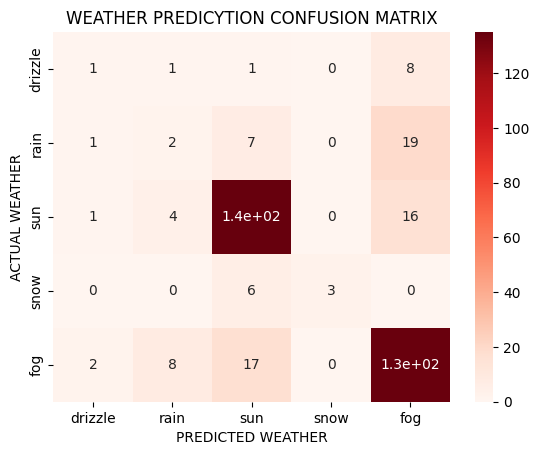

In [161]:

sns.heatmap(con_mat, annot=True,xticklabels=data["weather"].unique(), yticklabels=data["weather"].unique(),cmap="Reds")
plt.xlabel('PREDICTED WEATHER')
plt.ylabel('ACTUAL WEATHER')
plt.title('WEATHER PREDICYTION CONFUSION MATRIX')
plt.show()

Conclusion: The weather prediction model using the K-Nearest Neighbor algorithm has an approximate accuracy of 75%